# Read Data Files

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import time

In [2]:
business_info_df = pd.read_csv("business_info_all.csv", encoding = "ISO-8859-1")
print(business_info_df.shape)
business_info_df.head()

(1081, 9)


,address,biz_id,category,image_shown,name,num_reviews,price_range,star_rating,url
0,234 Western Ave,the-cuckoos-nest-albany,"['Southern', 'American (New)']",https://s3-media1.fl.yelpcdn.com/bphoto/6ZAVl7...,The Cuckooâs Nest,235.0,$$,4.5,https://www.yelp.com/biz/the-cuckoos-nest-alba...
1,79 N Pearl St,the-hollow-bar-and-kitchen-albany,"['American (New)', 'Music Venues', 'Venues & E...",https://s3-media4.fl.yelpcdn.com/bphoto/XjDwO1...,The Hollow Bar & Kitchen,304.0,$$,4.0,https://www.yelp.com/biz/the-hollow-bar-and-ki...
2,182A Washington Ave,iron-gate-cafe-albany,['Cafes'],https://s3-media3.fl.yelpcdn.com/bphoto/A01kLn...,Iron Gate Cafe,474.0,$$,4.5,https://www.yelp.com/biz/iron-gate-cafe-albany...
3,281 New Scotland Ave,the-albany-ale-and-oyster-albany,"['American (Traditional)', 'Beer Bar']",https://s3-media3.fl.yelpcdn.com/bphoto/H-GObC...,The Albany Ale & Oyster,240.0,$$,4.5,https://www.yelp.com/biz/the-albany-ale-and-oy...
4,109 Wolf Rd,kuma-ani-albany-4,['Ramen'],https://s3-media2.fl.yelpcdn.com/bphoto/ZX6doy...,Kuma Ani,22.0,NaN,4.5,https://www.yelp.com/biz/kuma-ani-albany-4?osq...


In [3]:
business_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 9 columns):
address        1036 non-null object
biz_id         1081 non-null object
category       1081 non-null object
image_shown    1081 non-null object
name           1081 non-null object
num_reviews    1081 non-null float64
price_range    874 non-null object
star_rating    1081 non-null float64
url            1081 non-null object
dtypes: float64(2), object(7)
memory usage: 76.1+ KB


In [4]:
#Business categories are stores as one string. Need to convert to a list of strings.
import ast
business_info_df.category = business_info_df.category.map(ast.literal_eval)

In [5]:
reviews_df = pd.read_csv("reviews_all.csv")
print(reviews_df.shape)
reviews_df.head()

(59274, 8)


,business_index,business_name,date,pic_count,pic_urls,review,star_rating,user_id
0,the-cuckoos-nest-albany,The Cuckoo’s Nest,2019-07-22,0,[],"#GRITS know best! So take it from this one, th...",5.0,NaN
1,the-cuckoos-nest-albany,The Cuckoo’s Nest,2019-08-13,0,[],Brunch was enjoyable from the mimosa starter t...,4.0,NaN
2,the-cuckoos-nest-albany,The Cuckoo’s Nest,2019-06-28,3,['https://s3-media2.fl.yelpcdn.com/bphoto/Jiq3...,If you're looking for a delicious meal on a la...,5.0,JakQRw_9dW-j5kJchUf2OQ
3,the-cuckoos-nest-albany,The Cuckoo’s Nest,2019-04-26,3,['https://s3-media3.fl.yelpcdn.com/bphoto/11Wc...,The best way I can describe this place is wit...,5.0,MVIlQinGxgwPH_XOUpoXrA
4,the-cuckoos-nest-albany,The Cuckoo’s Nest,2019-08-30,0,[],Had dinner here last night and I'm still think...,5.0,NaN


Print a random review:

In [6]:
#Print random review:

idx = np.random.randint(0,len(reviews_df))
print("NAME:",reviews_df.business_name[idx])
print("RATING:",reviews_df.star_rating[idx],"stars")
print("DATE:",reviews_df.date[idx])
print(reviews_df.review[idx])

NAME: Zen Asian Fusion Lounge
RATING: 2.0 stars
DATE: 3/7/2016
I went for lunch on Saturday with a couple of friends, the food was alright, nothing special, but the service was atrocious. We had to get up and go to the bar where our waitress was sitting with the bartender, staring at her phone, to get anything we needed. One friend wanted to order more food, but our waitress never came back to check on us. After waiting and hoping she would finally remember she had tables to attend to, I had to go up to her at the bar to ask for a box and for our check. We sat there with our credit card in the book for 5 minutes before my friend went up to the bar to ask if we could pay, the waitress continued texting for a while during the time my friend was up there, before finally getting up to swipe the card for us.


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59274 entries, 0 to 59273
Data columns (total 8 columns):
business_index    59274 non-null object
business_name     59274 non-null object
date              59274 non-null object
pic_count         59274 non-null int64
pic_urls          59274 non-null object
review            59274 non-null object
star_rating       59274 non-null float64
user_id           11699 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 3.6+ MB


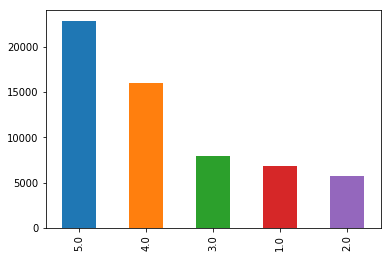

In [8]:
reviews_df.star_rating.value_counts().plot(kind='bar')

#### See all Categories represented

In [9]:
#categories = [item for sublist in l for item in sublist]
flat_list = []
for sublist in business_info_df.category:
    for item in sublist:
        flat_list.append(item)

categories = list(set(flat_list))
print(len(categories), "unique categories")

157 unique categories


## Define helper functions for selecting data from dataframes

- get_businesses_by_category(chosen_category)
- get_reviews_by_category(chosen_category)
- get_reviews_for_businesses(biz_id_list)

In [10]:
import re

def get_businesses_by_category(chosen_category):
    """
    This function returns all businesses in business_info_df for a particular category.
    Substrings of categories will also find the selected category.
    INPUTS:
    chosen_category = text string to match against category list in business_info_df category feature.
    OUTPUT:
    business_info_df selection based on chosen category.
    """
    chosen_category = chosen_category.lower()
    #Check if it is a substring also
    return business_info_df[ 
        [True in [bool(re.search(chosen_category, category.lower())) for category in category_list] 
         for category_list in business_info_df.category] ]
    #return business_info_df[[chosen_category in category for category in business_info_df.category]]

def get_reviews_by_category(chosen_category):
    """
    This function returns all reviews for a particular category.
    INPUTS:
    chosen_category = text string to match against category list in business_info_df category feature.
    OUTPUT:
    reviews_df selection based on chosen category.
    """
    #Select businesses
    biz_ids_for_category = get_businesses_by_category(chosen_category)['biz_id']
    #Select Reviews for businesses
    return reviews_df[[biz_id in biz_ids_for_category.values for biz_id in reviews_df.business_index.values]]

In [11]:
def get_reviews_for_businesses(biz_id_list):
    """
    This function returns all reviews for a list of business_index's.
    INPUTS:
    biz_id_list = list of text strings representing business indexes to select reviews on.
    OUTPUT:
    reviews_df selection based on chosen businesses.
    """
    return reviews_df[[biz_id in biz_id_list for biz_id in reviews_df.business_index.values]]

Downselecting categories based on number of businesses and number of reviews

In [12]:
min_businesses = 5
min_reviews = 1500

category_list = []
biz_list = []

for category in categories:
    businesses = get_businesses_by_category(category)['biz_id'].values
    num_businesses = len(businesses)
    num_reviews = len(get_reviews_by_category(category))
    if num_businesses > min_businesses and num_reviews > min_reviews:
        tabs = "\t"
        if (len(category) < 7):
            tabs = "\t\t"
        print(category, tabs, num_businesses, "places,\t", num_reviews,"reviews")
        category_list.append(category)
        biz_list.extend(businesses)
        
biz_list = list(set(biz_list))
print(len(biz_list),"unique businesses represented in these categories.")
print(len(get_reviews_for_businesses(biz_list)),"unique reviews represented in these categories.")

Bars 		 156 places,	 11303 reviews
Cafes 		 47 places,	 2313 reviews
Japanese 	 35 places,	 2988 reviews
Burgers 	 124 places,	 5478 reviews
Fast Food 	 92 places,	 2088 reviews
Pubs 		 53 places,	 4409 reviews
Chicken Wings 	 44 places,	 1676 reviews
Barbeque 	 21 places,	 1685 reviews
Mexican 	 37 places,	 2684 reviews
Salad 		 62 places,	 3289 reviews
Steakhouses 	 21 places,	 2146 reviews
Seafood 	 38 places,	 3769 reviews
Breakfast & Brunch 	 103 places,	 6032 reviews
Sandwiches 	 127 places,	 5393 reviews
Italian 	 97 places,	 6212 reviews
Cocktail Bars 	 18 places,	 1538 reviews
Mediterranean 	 17 places,	 1589 reviews
Coffee & Tea 	 53 places,	 1891 reviews
Pizza 		 145 places,	 6039 reviews
Diners 		 36 places,	 2054 reviews
Sushi Bars 	 37 places,	 3304 reviews
Delis 		 64 places,	 1891 reviews
Asian Fusion 	 20 places,	 1689 reviews
Indian 		 26 places,	 1873 reviews
Thai 		 25 places,	 1876 reviews
881 unique businesses represented in these categories.
49043 unique reviews 

In [14]:
category = 'italian'
num_businesses = len(get_businesses_by_category(category))
num_reviews = len(get_reviews_by_category(category))
print(category, "\t", num_businesses, "places,\t", num_reviews,"reviews")

italian 	 97 places,	 6212 reviews


In [15]:
get_businesses_by_category('italian')[0:5]

,address,biz_id,category,image_shown,name,num_reviews,price_range,star_rating,url
17,818 Central Ave,grappa-72-ristorante-albany,[Italian],https://s3-media2.fl.yelpcdn.com/bphoto/4rfIrV...,Grappa â72 Ristorante,209.0,$$,4.0,https://www.yelp.com/biz/grappa-72-ristorante-...
25,288 Lark St,288-lark-wine-and-tap-albany,"[Italian, Wine Bars]",https://s3-media1.fl.yelpcdn.com/bphoto/V9UQKq...,288 Lark Wine & Tap,10.0,NaN,4.5,https://www.yelp.com/biz/288-lark-wine-and-tap...
29,49 Grand St,cafe-capriccio-albany,[Italian],https://s3-media4.fl.yelpcdn.com/bphoto/xl-xQG...,Cafe Capriccio,132.0,$$$,4.0,https://www.yelp.com/biz/cafe-capriccio-albany...
33,320 Northern Blvd,risotto-albany,"[Mediterranean, Italian, Breakfast & Brunch]",https://s3-media4.fl.yelpcdn.com/bphoto/PD01st...,Risotto,118.0,$$,4.0,https://www.yelp.com/biz/risotto-albany?osq=re...
39,662 Central Ave,caffe-italia-albany,[Italian],https://s3-media1.fl.yelpcdn.com/bphoto/TnGFOD...,Caffe Italia,83.0,$$$,4.5,https://www.yelp.com/biz/caffe-italia-albany?o...


# Clean Text Function
Define function to clean text blocks.

In [16]:
# string.punctuation contains '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

def clean_text(text_block):
    """
    This function cleans a block of text.
    INPUT:
    text_block = The block of text to clean.
    OUTPUT:
    A block of text stripped of punctuation and made lowercase.
    """
    #Some reviews forget to have a space after a period. I want to force a space.
    #text_block = text_block.replace("."," ")
    #This represents a non-breaking space in the text block that needs to be removed.
    text_block = text_block.replace(u'\xa0', u' ')  
    #for symbol in ",.?!''\n":
    for symbol in '!"#$%()*+,-./:;<=>?@[\\]^_`{|}~':
        text_block = text_block.replace(symbol, ' ').lower()
    return text_block

In [17]:
clean_text(reviews_df.review[0])

" grits know best  so take it from this one  this is some delicious southern food  i ordered the fried chicken with corn bread and mac cheese for my fixins  yes  i said it  fixins  just like their menu says  the cornbread was huge and buttery  the fried very well seasoned with a hit of lemon which i loved  the mac cheese wasn't the best i have ever had but best i have had in this area so far  just wished i had a few burnt edges lol my friend had the blackened catfish and it was equally delicious  their services was quite friendly  our waitress wasn't as efficient and was a bit slow but the hostess made up for it  her friendliness over compensated and made it a very pleasant experience  the only criticism i have would be with the drinks as it seemed they packed the cups with ice before filling with the liquid  that tends to annoy me a bit as it will water down your drink as the ice melts  so i proceeded to take out all the ice and the hostess noticed and filled up the cup   kudosoverall

In [18]:
reviews_df.review[0]

'#GRITS know best! So take it from this one, this is some delicious Southern food! I ordered the fried chicken with corn bread and mac/cheese for my fixins! Yes! I said it "fixins" just like their menu says. The cornbread was HUGE and buttery. The fried very well seasoned with a hit of lemon which I LOVED. The mac/cheese wasn\'t the best I have ever had but best I have had in this area so far, just wished I had a few burnt edges lol My friend had the blackened catfish and it was equally delicious! Their services was quite friendly! Our waitress wasn\'t as efficient and was a bit slow but the hostess made up for it! Her friendliness over compensated and made it a very pleasant experience. The only criticism I have would be with the drinks as it seemed they packed the cups with ice before filling with the liquid. That tends to annoy me a bit as it will water down your drink as the ice melts. So I proceeded to take out all the ice and the hostess noticed and filled up the cup! #kudosOvera

# Tokenize Text Function
Define function to tokenize text blocks.

In [21]:
#Declare default tokenizer method and stopwords list that will be used in the my_tokenizer() method.
default_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False).tokenize

def my_tokenizer(text_block,  
                 tokenizer=default_tokenizer):
    """
    This function cleans a block of text using the clean_text() function and then
    tokenizes the cleaned block of text.
    
    INPUTS:
    text_block = The text string to be tokenized.
    tokenizer  = The tokenizer method to use for splitting the text string into tokens. 
                 Default is default_tokenizer defined outside of this function.
    OUTPUT:
    List of words in the text block.
    """
    tokens = tokenizer(clean_text(text_block))
    return tokens

# TF-IDF Stuff to figure out Stopwords

### Manual Methods

Count Vectorize Function

In [22]:
def count_vectorize(text_block, vocab=None):
    if vocab == None:
        vocab = list(set(text_block))
        
    text_dict = {i:0 for i in vocab}
    
    for word in text_block:
        text_dict[word] = text_dict.get(word, 0) + 1
        
    return text_dict

Term Frequency Function

In [24]:
def term_frequency(BoW_dict):
    total_terms = sum(BoW_dict.values())
    term_freq = {}
    for key, value in BoW_dict.items():
        term_freq[key] = value/total_terms
    return term_freq

Inverse Document Frequency Function

In [115]:
def inverse_document_frequency(list_of_dicts):
    num_docs = len(list_of_dicts)
    
    vocab = set()
    for d in list_of_dicts:
        vocab.update(d.keys())
        
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if d.get(word,False):
                docs += 1
        # Now that we know denominator for equation, compute and set IDF value for word
        full_vocab_dict[word] = np.log(num_docs/float(docs))
    
    return full_vocab_dict

TF IDF Function

In [141]:
def tf_idf(list_of_dicts):
    # Create empty dictionary containing full vocabulary of entire corpus
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in list_of_dicts:
        doc_tf_idf = {}
        doc_tf = term_frequency(doc)
        for word in doc_tf.keys():
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts

### Get TFIDF for every review - WARNING THIS TAKES FOREVER TO RUN

In [264]:
reviews = reviews_df.review

print("Tokenize and Count Vectorize: ", end='')
start = time.time()

#Tokenize
reviews_tokenized = reviews.map(my_tokenizer)

#Count Vectorize
reviews_vectorized = reviews_tokenized.map(count_vectorize)

end = time.time()
print(time.strftime('%H:%M:%S', time.gmtime(end-start)))

Tokenize and Count Vectorize: 00:00:31


In [272]:
print("Compute Inverse Document Frequency: ", end='')
start = time.time()

#Explore IDF for entire corpus
idf_total = inverse_document_frequency(reviews_vectorized)

end = time.time()
print(time.strftime('%H:%M:%S', time.gmtime(end-start)))

Compute Inverse Document Frequency: 00:14:15


In [273]:
idf_sorted = sorted(idf_total.items(), key=lambda x: x[1], reverse=False)
idf_sorted[0:20]

[('the', 0.09574554128778558),
 ('and', 0.11367290893426686),
 ('a', 0.2421809587620774),
 ('to', 0.3392767188702173),
 ('i', 0.3627378541329993),
 ('of', 0.49062854006541295),
 ('was', 0.49571170477592563),
 ('for', 0.5065159978910839),
 ('is', 0.5203579272608135),
 ('in', 0.5585787714146307),
 ('it', 0.5771840977118955),
 ('food', 0.6440630256081394),
 ('but', 0.7164969356972832),
 ('with', 0.7171879490958885),
 ('this', 0.7460098024760725),
 ('my', 0.7953746399382119),
 ('on', 0.8406727583859115),
 ('good', 0.8928473386842154),
 ('that', 0.8957768066674449),
 ('they', 0.9105962095402043)]

Inspect Stopwords

In [277]:
n=100
top_n_idf = [word[0] for word in idf_sorted[0:n]]

nltk_stopwords = nltk.corpus.stopwords.words('english')

words_in_both_lists = [word for word in top_n_idf if word in nltk_stopwords]
print("In Both IDF words and NLTK Stopwords:",len(words_in_both_lists))
print(words_in_both_lists,"\n")

idf_only = [word for word in top_n_idf if word not in nltk_stopwords]
print("Only in IDF words:",len(idf_only))
print(idf_only,"\n")

nltk_only = [word for word in nltk_stopwords if word not in top_n_idf]
print("Only in NLTK Stopwords:",len(nltk_only))
print(nltk_only)

In Both IDF words and NLTK Stopwords: 65
['the', 'and', 'a', 'to', 'i', 'of', 'was', 'for', 'is', 'in', 'it', 'but', 'with', 'this', 'my', 'on', 'that', 'they', 'had', 'not', 'have', 'were', 'we', 'you', 'are', 'be', 'so', 'at', 'very', 'here', 'as', 'there', 'out', 'if', 'all', 'just', 'from', 'or', 'when', 'their', 'an', 'which', 'our', 'will', "it's", 'me', 'up', 'been', 'some', 'about', 'more', 'what', 'only', 'no', 'can', 'by', 'too', 'other', "don't", 'has', 'because', 'your', 'than', 'them', 'after'] 

Only in IDF words: 35
['food', 'good', 'place', 'great', 'service', 'like', 'back', 'time', 'one', 'go', 'get', 'would', 'ordered', 'also', 'really', 'delicious', 'restaurant', 'nice', 'chicken', 'menu', 'best', 'order', 'well', 'friendly', 'staff', 'got', 'even', "i've", 'try', 'came', 'little', 'always', 'us', "i'm", 'definitely'] 

Only in NLTK Stopwords: 114
['myself', 'ours', 'ourselves', "you're", "you've", "you'll", "you'd", 'yours', 'yourself', 'yourselves', 'he', 'him', '

In [290]:
idf_df = pd.DataFrame(idf_sorted,columns=['word','idf_weight'])
idf_df['in_nltk_stopwds'] = idf_df.word.map(lambda x: x in nltk.corpus.stopwords.words('english') )

In [292]:
#Write IDF and weights to CSV File
#idf_df.to_csv('idf.csv',index=False)

TFIDF

In [275]:
print("Compute TF-IDF: ", end='')
start = time.time()

tf_idf_vectors = tf_idf(reviews_vectorized)

end = time.time()
print(time.strftime('%H:%M:%S', time.gmtime(end-start)))

Compute TF-IDF: 00:14:15


In [293]:
idx = 0
sorted(tf_idf_vectors[idx].items(), key=lambda x: x[1], reverse=True)[0:10]

[('fixins', 0.0752897803560938),
 ('hostess', 0.056322424590249914),
 ('ice', 0.05038458577922589),
 ('kudosoverall', 0.04995420927396604),
 ('annoy', 0.03707596680098324),
 ('compensated', 0.03681615582898347),
 ('mac', 0.034774596922733374),
 ('friendliness', 0.03226411700982683),
 ('catfish', 0.03126841898226917),
 ('criticism', 0.03064286726465077)]

## Sklearn Method - runs more quickly

In [319]:
#SKLEARN
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [320]:
#Clean Text before Tokenizing
data_cleaned = reviews_df.review.map(clean_text)

In [321]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform(data_cleaned)
print("Word Count Vector shape:",word_count_vector.shape)

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
idf_df = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weight"])
 
# sort ascending
print("IDF sorted:")
idf_df.sort_values(by=['idf_weight']).head(10)

Word Count Vector shape: (59274, 48729)
IDF sorted:


,idf_weight
the,1.095744
and,1.113671
to,1.339246
it,1.483862
of,1.490618
was,1.495701
for,1.506505
is,1.520346
in,1.558537
food,1.643791


TFIDF for all documents

In [322]:
# count matrix
#count_vector=cv.transform(data_cleaned)

# tf-idf scores
#tf_idf_vectors=tfidf_transformer.transform(count_vector)
tf_idf_vectors=tfidf_transformer.transform(word_count_vector)

In [323]:
data_cleaned[0]

" grits know best  so take it from this one  this is some delicious southern food  i ordered the fried chicken with corn bread and mac cheese for my fixins  yes  i said it  fixins  just like their menu says  the cornbread was huge and buttery  the fried very well seasoned with a hit of lemon which i loved  the mac cheese wasn't the best i have ever had but best i have had in this area so far  just wished i had a few burnt edges lol my friend had the blackened catfish and it was equally delicious  their services was quite friendly  our waitress wasn't as efficient and was a bit slow but the hostess made up for it  her friendliness over compensated and made it a very pleasant experience  the only criticism i have would be with the drinks as it seemed they packed the cups with ice before filling with the liquid  that tends to annoy me a bit as it will water down your drink as the ice melts  so i proceeded to take out all the ice and the hostess noticed and filled up the cup   kudosoverall

In [324]:
#get tfidf vector for document
idx = 0
doc_vector=tf_idf_vectors[idx]
 
#print the scores
df = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(10)

,tfidf
fixins,0.266601
the,0.253545
hostess,0.222492
ice,0.203661
it,0.171676
kudosoverall,0.163373
mac,0.139164
as,0.132662
annoy,0.131597
compensated,0.130815


Look at potential stopwords and compare to NLTK corpus of stopwords

In [325]:
n=100
top_n_idf = list(idf_df.sort_values(by=['idf_weight']).head(n).index)
nltk_stopwords = nltk.corpus.stopwords.words('english')

words_in_both_lists = [word for word in top_n_idf if word in nltk_stopwords]
print("In Both IDF words and NLTK Stopwords:",len(words_in_both_lists))
print(words_in_both_lists,"\n")

idf_only = [word for word in top_n_idf if word not in nltk_stopwords]
print("Only in IDF words:",len(idf_only))
print(idf_only,"\n")

nltk_only = [word for word in nltk_stopwords if word not in top_n_idf]
print("Only in NLTK Stopwords:",len(nltk_only))
print(nltk_only)

In Both IDF words and NLTK Stopwords: 65
['the', 'and', 'to', 'it', 'of', 'was', 'for', 'is', 'in', 'but', 'with', 'this', 'my', 'on', 'that', 'they', 'had', 'not', 'have', 'you', 'we', 'were', 'are', 'be', 'so', 'at', 'very', 'there', 'here', 'as', 'out', 'if', 'all', 'just', 'from', 'or', 'when', 'their', 'can', 'an', 'which', 'our', 'will', 'me', 'up', 'been', 'some', 'about', 'what', 'more', 'only', 've', 'no', 'by', 'too', 'other', 'don', 'has', 'because', 'your', 'than', 'them', 'after', 'over', 'again'] 

Only in IDF words: 35
['food', 'good', 'place', 'great', 'service', 'like', 'back', 'time', 'one', 'go', 'get', 'would', 'ordered', 'also', 'really', 'delicious', 'restaurant', 'nice', 'chicken', 'menu', 'best', 'order', 'well', 'friendly', 'staff', 'got', 'even', 'try', 'came', 'little', 'always', 'us', 'definitely', 'love', 'went'] 

Only in NLTK Stopwords: 114
['i', 'myself', 'ours', 'ourselves', "you're", "you've", "you'll", "you'd", 'yours', 'yourself', 'yourselves', 'he',

# TFIDF for a category

In [355]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [356]:
chosen_category = "italian"

chosen_reviews = get_reviews_by_category(chosen_category)

cleaned = chosen_reviews.review.map(clean_text)
#cleaned.reset_index(drop=True, inplace=True)

In [357]:
#TFIDF Vectorizer (settings for count vectorizer included)
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

#Fit all Docs
tfidf_vectors=tfidf_vectorizer.fit_transform(cleaned)

In [358]:
# print idf values
df_idf = pd.DataFrame(tfidf_vectorizer.idf_, index=tfidf_vectorizer.get_feature_names(),columns=["idf_weight"])

# sort ascending
df_idf.sort_values(by=["idf_weight"]).head(100).index

Index(['the', 'and', 'to', 'was', 'it', 'for', 'of', 'is', 'in', 'food',
       'with', 'but', 'this', 'my', 'had', 'on', 'that', 'we', 'good', 'they',
       'not', 'have', 'you', 'were', 'place', 'great', 'be', 'so', 'very',
       'at', 'service', 'are', 'there', 'here', 'as', 'italian', 'out', 'our',
       'if', 'time', 'all', 'from', 'just', 'like', 'back', 'one', 'an',
       'pizza', 'restaurant', 'when', 'go', 'their', 'sauce', 'would', 'which',
       'ordered', 'will', 'or', 'can', 'been', 'get', 'delicious', 'up',
       'chicken', 'best', 'about', 'me', 'also', 'what', 'more', 'only',
       'really', 'dinner', 'some', 'no', 'by', 'pasta', 'nice', 've', 'order',
       'well', 'us', 'bread', 'salad', 'friendly', 'meal', 'menu', 'too',
       'came', 'because', 'has', 'staff', 'other', 'even', 'got', 'made',
       'don', 'little', 'over', 'never'],
      dtype='object')

In [359]:
#get tfidf vector for document
idx = 0
doc_vector=tfidf_vectors[idx]
 
#print the scores
df = pd.DataFrame(doc_vector.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(10)

,tfidf
tapenade,0.212564
we,0.203523
were,0.159381
and,0.157736
quickly,0.146000
skepticism,0.142598
sourdough,0.142598
30p,0.142598
antara,0.142598
of,0.140363


### Divide by star rating on category

In [360]:
chosen_category = "italian"
chosen_reviews = get_reviews_by_category(chosen_category)

In [377]:
#get tfidf vectors for star ratings
tf_idf_vectors = {}

for rating in chosen_reviews.star_rating.unique():
    combined_text = cleaned[chosen_reviews.star_rating==rating].str.cat(sep=' ')
    tf_idf_vectors[rating] = tfidf_vectorizer.transform([combined_text])

In [381]:
#print the scores

for rating in sorted(tf_idf_vectors.keys(),reverse=True):
    df = pd.DataFrame(tf_idf_vectors[rating].T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
    print(rating,"rating")
    display(df.sort_values(by=["tfidf"],ascending=False).head(10))
    print("")

5.0 rating


,tfidf
the,0.428792
and,0.326473
to,0.193004
was,0.190960
is,0.179631
of,0.157884
we,0.157801
it,0.150291
in,0.138312
for,0.135491



4.0 rating


,tfidf
the,0.436502
and,0.301652
was,0.225414
of,0.191141
to,0.190535
it,0.180550
is,0.152185
with,0.141071
for,0.140416
we,0.138621



3.0 rating


,tfidf
the,0.444463
and,0.268845
was,0.259205
it,0.202948
to,0.195759
of,0.172384
but,0.146705
we,0.140696
for,0.134114
is,0.126508



2.0 rating


,tfidf
the,0.428046
was,0.259496
and,0.250914
to,0.233520
it,0.198288
of,0.171213
we,0.163279
for,0.138697
not,0.131797
that,0.129871



1.0 rating


,tfidf
the,0.393071
and,0.264898
was,0.254948
to,0.252293
we,0.179954
it,0.172707
of,0.151536
that,0.129391
not,0.122473
for,0.121190


In [6]:
from data_queries import get_businesses_by_category
from data_queries import get_reviews_by_category 
from data_queries import get_businesses_by_name
from data_queries import get_reviews_for_businesses

In [9]:
get_reviews_by_category('beer')

NameError: name 'business_info_df' is not defined